In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px 

In [3]:
#Dataset limpio
wine = pd.read_csv('winequality_clean.csv')

Segun el dataset de wine, realice las siguientes actividades:
- Limpie las variables numericas. (evalue primero si vale la pena estretificar por type), en caso de existir valores atipicos remplece por la media.
- Aplique PCA utilizando maximo 5 columnas (evalue si el PCA vale la pena hacer uno para white y otro para red)
        - No se debe de usar quality para este ejercicio
- Una ves tenga el PCA, aplique un algoritmo de k-means para crear tres perfiles del vino. (explique que significa cada perfil)
- Agregue la nueva variable al dateset y elimine las columnas que hayan formado parte de analisis del PCA, tanto para white como para red, en caso que hayan sido entrenamientos distintos.
- Crea la varible de respuesta de la siguiente manera:
    - if quality >= 5 ? 1 else 0
- Elimine la variable quality del dataset
- Aplique los siguientes entrenamientos de MLS (evalue primero si vale la pena estretificar por type):
    - Regresion Logistica
    - NN
    - Aroboles de desiciones
    - Random Forest
- Explique cual de los entrenamientos fue el mejor?

In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.009734,0.313649,0.317829,5.186632,0.050949,29.893249,115.427350,0.994685,3.213734,0.516885,10.490004,5.763113
std,0.878065,0.120190,0.106051,4.307623,0.018101,16.272485,55.909441,0.002935,0.151349,0.118051,1.189748,0.757416
min,4.500000,0.080000,0.040000,0.600000,0.009000,1.000000,6.000000,0.987110,2.800000,0.220000,8.000000,4.000000
25%,6.400000,0.230000,0.260000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.311648,3.000000,0.047000,29.000000,118.000000,0.994880,3.210000,0.510000,10.300000,6.000000
75%,7.500000,0.370000,0.380000,7.800000,0.059000,41.000000,155.000000,0.996990,3.320000,0.590000,11.300000,6.000000
max,9.600000,0.655000,0.600000,17.500000,0.105000,77.000000,272.000000,1.003690,3.630000,0.850000,14.000000,7.000000


In [5]:
wines_n = wine.loc[:,['fixed acidity', 'volatile acidity','pH', 'alcohol', 'density']].copy()
# Correlacion

correlacion = wines_n.corr()
correlacion


,fixed acidity,volatile acidity,pH,alcohol,density
fixed acidity,1.000000,0.146988,-0.210268,-0.137607,0.354978
volatile acidity,0.146988,1.000000,0.176798,-0.015431,0.236275
pH,-0.210268,0.176798,1.000000,0.107260,0.015587
alcohol,-0.137607,-0.015431,0.107260,1.000000,-0.702234
density,0.354978,0.236275,0.015587,-0.702234,1.000000


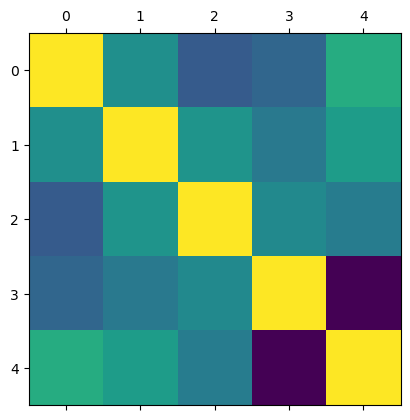

In [6]:
plt.matshow(correlacion) 

In [11]:
# Implementacion de PCA
cols_to_use = ['fixed acidity', 'volatile acidity','pH', 'alcohol', 'density']

In [13]:
x = wine.loc[:, cols_to_use].values
x

array([[ 7.     ,  0.27   ,  3.     ,  8.8    ,  1.001  ],
       [ 6.3    ,  0.3    ,  3.3    ,  9.5    ,  0.994  ],
       [ 8.1    ,  0.28   ,  3.26   , 10.1    ,  0.9951 ],
       ...,
       [ 6.3    ,  0.51   ,  3.42   , 11.     ,  0.99574],
       [ 5.9    ,  0.645  ,  3.57   , 10.2    ,  0.99547],
       [ 6.     ,  0.31   ,  3.39   , 11.     ,  0.99549]])

In [15]:
x = StandardScaler().fit_transform(x)
x

array([[-0.01108707, -0.36319143, -1.41229747, -1.42058099,  2.15167442],
       [-0.80835621, -0.11356747,  0.57002498, -0.83217593, -0.23340129],
       [ 1.24176445, -0.27998344,  0.30571532, -0.32782874,  0.14139632],
       ...,
       [-0.80835621,  1.63380029,  1.36295396,  0.42869204,  0.35946038],
       [-1.26393858,  2.75710814,  2.35411518, -0.24377088,  0.26746461],
       [-1.15004299, -0.03035948,  1.16472171,  0.42869204,  0.27427911]])

In [16]:
x = np.around(x, 2)

In [17]:
np.nan_to_num(x)

array([[-0.01, -0.36, -1.41, -1.42,  2.15],
       [-0.81, -0.11,  0.57, -0.83, -0.23],
       [ 1.24, -0.28,  0.31, -0.33,  0.14],
       ...,
       [-0.81,  1.63,  1.36,  0.43,  0.36],
       [-1.26,  2.76,  2.35, -0.24,  0.27],
       [-1.15, -0.03,  1.16,  0.43,  0.27]])

In [18]:
pca = PCA(n_components=2)

In [19]:
principalComponents = pca.fit_transform(x)

In [20]:
pcadf = pd.DataFrame(data=principalComponents ,columns=['c1','c2']) 

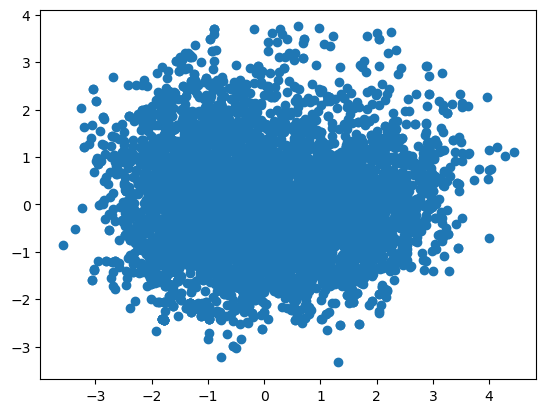

In [21]:
plt.scatter( pcadf['c1'] , pcadf['c2'] )